# Lab 3: Deep Sequence Modeling

The third lab session is about data that have a sequential structure that must be taken into account.

In [4]:
from __future__ import print_function
import tensorflow as tf
import os, json, re
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pandas as pd
%matplotlib inline

# 3.1 Deal with sequential data
<img src="https://drive.google.com/uc?id=1k6HwtWlMTkVJFuyBpeBGF2sApqxR-KRc" width="600px" align="right"><br>
In this lab we see Deep Learning models that can process sequential data (text, timeseries,..).<br>
These models don’t take as input raw text: they only work with numeric tensors; **vectorizing** text is the process of transforming text into numeric tensors.<br><br><br>
The different units into which you can break down text (words, characters) are called tokens; then if you apply a tokenization scheme, you associate numeric vectors with the generated tokens.<br>
These vectors, packed into sequence tensors, are fed into Deep Neural Network.<br>
There are multiple ways to associate a vector with a token: we will see One-Hot Encoding and Token Embedding.<br>
In this section we are going to deal with:
* 3.1.1 One-Hot Encoding
* 3.1.2 Word embedding

## 3.1.1 One-Hot Encoding
One-Hot Encoding consists of associating a unique integer index with every word and then turning this integer index $i$ into a binary vector of size $N$ (the size of the vocabulary); the vector is all zeros except for the $i$-th entry, which is 1.
<img src="https://drive.google.com/uc?id=1OzK9t_WXQsaDuZoOTQSksLuNMubXm0gc" width="400px">

#### Try to perform One-Hot Encoding using Tokenizer
Keras provides the Tokenizer class for preparing text documents for DL.<br>
The Tokenizer must be constructed and then fit on either raw text documents or integer encoded text documents

In [5]:
# define 4 documents
docs = ['Well done!','Good work','Great effort','nice work']

# create the tokenizer
tokenizer = Tokenizer()

# fit the tokenizer on the documents
tokenizer.fit_on_texts(docs)


encoded_docs = tokenizer.texts_to_matrix(docs, mode='count')
print(encoded_docs)

[[0. 0. 1. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 1. 0.]
 [0. 1. 0. 0. 0. 0. 0. 1.]]


Some problems related to this kind of encoding are sparsity of the solution and the high dimensionality of the vector encoding of the tokens.

## 3.1.2 Word embedding
<img src="https://drive.google.com/uc?id=1YRcQ1_5n8Qay0GFoSLVrNcEKWeik5G3S" width="400px" align="right"><br>
The vector obtained from word embedding is dense and has lower dimensionality w.r.t One-Hot Encoding vector; the dimensionality of embedding space vector is an hyperparameter.<br>
There are two ways to obtain word embeddings:<br>
* May be learned jointly with the network
* May use pre-trained word vectors (Word2Vec, GloVe,..)


Word embeddings maps human language into a geometric space; in a reasonable embedding space synonyms are embedded into similar word vectors and the geometric distance between any two word vectors reflects the semantic distance between the associated words (words meaning different things are embedded at points far away from each other, whereas related words are closer).<br>
How good is a word-embedding space depends on the specific task.<br>
It is reasonable to learn a new embedding space with every new task: with backpropagation and Keras it reduces to learn the weights of the Embedding layer.

### Learning Word Embeddings with the embedding layer
#### Load imdb dataset
This dataset contains movies reviews from IMDB, labeled by sentiment(positive/negative); reviews have been preprocessed, and each review is encoded as a sequence of word indexes(integers).<br>
https://keras.io/datasets/#imdb-movie-reviews-sentiment-classification

In [7]:
max_features = 10000
maxlen = 50

imdb = tf.keras.datasets.imdb
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

C:\Users\vitop\Anaconda3\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\vitop\Anaconda3\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


#### Show the size of vocabulary and the most frequent words

In [8]:
word_to_index = imdb.get_word_index()

vocab_size = len(word_to_index)
print('Vocab size : ', vocab_size)


words_freq_list =words_freq_list = []
[]
for (k,v) in imdb.get_word_index().items():
    words_freq_list.append((k,v))

sorted_list = sorted(words_freq_list, key=lambda x: x[1])

print("50 most common words: \n")
print(sorted_list[0:50])

Vocab size :  88584
50 most common words: 

[('the', 1), ('and', 2), ('a', 3), ('of', 4), ('to', 5), ('is', 6), ('br', 7), ('in', 8), ('it', 9), ('i', 10), ('this', 11), ('that', 12), ('was', 13), ('as', 14), ('for', 15), ('with', 16), ('movie', 17), ('but', 18), ('film', 19), ('on', 20), ('not', 21), ('you', 22), ('are', 23), ('his', 24), ('have', 25), ('he', 26), ('be', 27), ('one', 28), ('all', 29), ('at', 30), ('by', 31), ('an', 32), ('they', 33), ('who', 34), ('so', 35), ('from', 36), ('like', 37), ('her', 38), ('or', 39), ('just', 40), ('about', 41), ("it's", 42), ('out', 43), ('has', 44), ('if', 45), ('some', 46), ('there', 47), ('what', 48), ('good', 49), ('more', 50)]


In [9]:
word_to_index['otherwise']

897

# 3.2 Recurrent Neural Network
Here https://colah.github.io/posts/2015-08-Understanding-LSTMs/ you can find a clear explanation about RNNs and LSTMs; the following is a summary of the main concepts.


A major characteristic of some neural networks, as ConvNet, is that they have no memory: each input is processed independently, with no state kept in between inputs. Biological intelligence processes information incrementally while maintaining an internal model of what it’s processing, built from past information and constantly updated as new information comes in.<br>
A recurrent neural network (RNN) adopts the same principle but in an extremely simplified version: it processes sequences by iterating through the sequence elements and maintaining a state containing information relative to what it has seen so far.

<img src="https://drive.google.com/uc?id=1RaDXXygc0HJv6YyIAjU4_Nbw1bXzAhAJ" width="650px"><br>




Each input $x_{i=t-1, t, t+1, ..}$ is combined with the internal state and then is applied an activation function (e.g. $tanh$); then the output is computed $h_{i=t-1, t, t+1, ..}$ and the internal state is updated.<br>
In many cases, you just need the last output ($h_{i=last t}$ at the end of the loop), because it already contains information
about the entire sequence.
<img src="https://drive.google.com/uc?id=1RtulDLKQnzZTSbBsD2n7TIlRVEaESB8o" width="550px">


#### Create the model
In the following sections we will develop different models. Be careful to the fact that we are dealing with a binary classification problem!

In [10]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(max_features, 16))

# Complete the model, it should be made by at least:
# 1 SimpleRNN layer
# 1 Dense layer
model.add(tf.keras.layers.SimpleRNN(32))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

#### Train the model

In [11]:
# Train your model here
history = model.fit(x_train, y_train,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 6s 39ms/step - loss: 0.6046 - acc: 0.6564 - val_loss: 0.4899 - val_acc: 0.7680
Epoch 2/10
157/157 [==============================] - 6s 39ms/step - loss: 0.4073 - acc: 0.8212 - val_loss: 0.4409 - val_acc: 0.7980
Epoch 3/10
157/157 [==============================] - 6s 40ms/step - loss: 0.3222 - acc: 0.8669 - val_loss: 0.4495 - val_acc: 0.7804
Epoch 4/10
157/157 [==============================] - 6s 40ms/step - loss: 0.2624 - acc: 0.8960 - val_loss: 0.4968 - val_acc: 0.7950
Epoch 5/10
157/157 [==============================] - 7s 44ms/step - loss: 0.2079 - acc: 0.9204 - val_loss: 0.5084 - val_acc: 0.7784
Epoch 6/10
157/157 [==============================] - 7s 42ms/step - loss: 0.1539 - acc: 0.9441 - val_loss: 0.5642 - val_acc: 0.7910
Epoch 7/10
157/157 [==============================] - 7s 43ms/step - loss: 0.1031 - acc: 0.9664 - val_loss: 0.6794 - val_acc: 0.7330
Epoch 8/10
157/157 [==============================] - 6s 41ms/step - 

In [12]:
def plot_history(history):
    # Plot training & validation accuracy values
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()

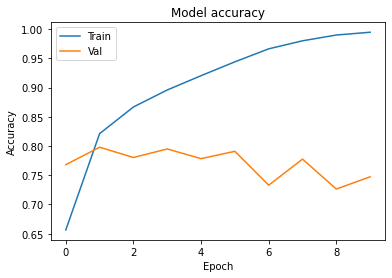

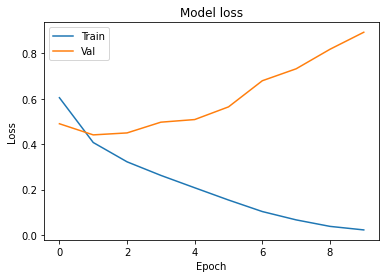

In [13]:
plot_history(history)

#### Evaluate the model

In [14]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=1)
print('Test accuracy: %.3f, Test loss: %.3f' % (test_acc,test_loss))

782/782 [==============================] - 4s 5ms/step - loss: 0.8672 - acc: 0.7548
Test accuracy: 0.755, Test loss: 0.867


#### Try to build a new model where you stack several recurrent layers.
In such a setup, you have to get all of the intermediate layers to return full sequence of outputs. This is needed to return batch size, timesteps, hidden state. By doing this the output should contain all historical generated outputs along with time stamps (3D). This way the next layer can work further on the data.

In [15]:
# Build the model. It should be made by at least:
# 1 Embedding layer
# More than 1 SimpleRNN layer, do not forget to put the return_sequences parameter to True 
# 1 Dense layer
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(max_features, 16))



#add SimpleRNN layers here 



model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

#### Train the model

In [16]:
# Train your model here
history = model.fit(x_train, y_train,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 22s 142ms/step - loss: 0.6658 - acc: 0.5706 - val_loss: 0.5934 - val_acc: 0.6752
Epoch 2/10
157/157 [==============================] - 22s 141ms/step - loss: 0.4478 - acc: 0.7955 - val_loss: 0.5051 - val_acc: 0.7882
Epoch 3/10
157/157 [==============================] - 23s 147ms/step - loss: 0.3519 - acc: 0.8483 - val_loss: 0.4247 - val_acc: 0.8054
Epoch 4/10
157/157 [==============================] - 23s 148ms/step - loss: 0.2926 - acc: 0.8790 - val_loss: 0.5127 - val_acc: 0.7502
Epoch 5/10
157/157 [==============================] - 23s 148ms/step - loss: 0.2330 - acc: 0.9065 - val_loss: 0.7823 - val_acc: 0.7684
Epoch 6/10
157/157 [==============================] - 34s 218ms/step - loss: 0.1723 - acc: 0.9347 - val_loss: 0.5585 - val_acc: 0.7648
Epoch 7/10
157/157 [==============================] - 35s 222ms/step - loss: 0.1133 - acc: 0.9600 - val_loss: 0.7262 - val_acc: 0.7702
Epoch 8/10
157/157 [==============================] - 3

In [0]:
plot_history(history)

#### Evaluate the model

In [17]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=1)
print('Test accuracy: %.3f, Test loss: %.3f' % (test_acc,test_loss))

782/782 [==============================] - 36s 46ms/step - loss: 1.1467 - acc: 0.7674
Test accuracy: 0.767, Test loss: 1.147


**What can you say about the obtained results? What about the comparison between these results and the ones obtained in the single layer RNN?**

# 3.3 LSTM Network
LSTMs are a special kind of recurrent neural network which works, for many tasks, much better than the standard RNNs.<br>
These nets are capable of learning long-term dependencies (they are explicitly designed to avoid the long-term dependency problem); remembering information for long periods of time is practically their default behavior.<br><br>

<img src="https://drive.google.com/uc?id=1CQ0RkQrnIkr1dFqSU1qHfPh5sJe_A6pQ" width="650px"><br>

RNNs have a very simple structure, such as a single $tanh$ layer.<br>
LSTMs also have a chain like structure, but the repeating module has a different structure: instead of having a single neural network layer, there are four, interacting in a very special way

#### Create LSTM model in TensorFlow

In [18]:
# Build the model. It should be made by at least:
# 1 Embedding layer
# 1 LSTM layer
# 1 Dense layer
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(max_features, 16))
model.add(tf.keras.layers.LSTM(32))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])

#### Train the model

In [19]:
# Train your model here
history = model.fit(x_train, y_train,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 2s 10ms/step - loss: 0.5461 - acc: 0.7138 - val_loss: 0.4534 - val_acc: 0.7892
Epoch 2/10
157/157 [==============================] - 1s 8ms/step - loss: 0.3746 - acc: 0.8345 - val_loss: 0.4084 - val_acc: 0.8100
Epoch 3/10
157/157 [==============================] - 1s 8ms/step - loss: 0.3204 - acc: 0.8648 - val_loss: 0.4127 - val_acc: 0.8064
Epoch 4/10
157/157 [==============================] - 1s 9ms/step - loss: 0.2910 - acc: 0.8804 - val_loss: 0.5320 - val_acc: 0.7924
Epoch 5/10
157/157 [==============================] - 1s 8ms/step - loss: 0.2692 - acc: 0.8909 - val_loss: 0.4663 - val_acc: 0.8012
Epoch 6/10
157/157 [==============================] - 1s 8ms/step - loss: 0.2543 - acc: 0.9006 - val_loss: 0.4709 - val_acc: 0.7896
Epoch 7/10
157/157 [==============================] - 1s 8ms/step - loss: 0.2425 - acc: 0.9054 - val_loss: 0.4692 - val_acc: 0.7964
Epoch 8/10
157/157 [==============================] - 2s 10ms/step - loss: 

In [0]:
plot_history(history)

#### Evaluate the model

In [20]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=1)
print('Test accuracy: %.3f, Test loss: %.3f' % (test_acc,test_loss))

782/782 [==============================] - 3s 3ms/step - loss: 0.4686 - acc: 0.7993
Test accuracy: 0.799, Test loss: 0.469


**Try to stack more LSTM layers together**. Does the classification accuracy improve?

In [ ]:
# Build the model. It should be made by at least:
# 1 Embedding layer
# 1 LSTM layer
# 1 Dense layer
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(max_features, 16))
model.add(tf.keras.layers.LSTM(32))


#stack more LSTM layers here 


model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])

# Train your model here
history = model.fit(x_train, y_train,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

test_loss, test_acc = model.evaluate(x_test, y_test, verbose=1)
print('Test accuracy: %.3f, Test loss: %.3f' % (test_acc,test_loss))